<a href="https://colab.research.google.com/github/gtseo0606/Learned/blob/main/Celebrity%20Classifier%20Service%20Using%20Crawling%20and%20Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [2]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 86 (delta 38), reused 46 (delta 16), pack-reused 0
Unpacking objects: 100% (86/86), done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [3]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

* <b>마동석</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [4]:
query = '흥인지문'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Fblog%2F1309C0494D2B94411D)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Fblog%2F1309C0494D2B94411D
[Error] HTTP Error 403: Forbidden
#1 이미지 다운로드 (http://cfile25.uf.tistory.com/image/99E5324B5AA1C882272429)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=17148&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L)
[Error] Invalid image, not saving http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=17148&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L
[Info] Issue getting: http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=17148&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L
[Error] No active exception to reraise
#2 이미지 다운로드 (http://cfs12.blog.daum.net/image/20/blog/

* <b>김종국</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [5]:
query = '숙정문'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=22970&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L)
[Error] Invalid image, not saving http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=22970&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L
[Info] Issue getting: http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=22970&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L
[Error] No active exception to reraise
#1 이미지 다운로드 (http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=22971&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L)
[Error] Invalid image, not saving http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=22971&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L
[Info] Issue getting: http://korean.visitseoul.net/comm/getImage?srvcId=MEDIA&amp;parentSn=22971&amp;fileTy=MEDIA&amp;fileNo=1&amp;thumbTy=L
[Error] No active exception to reraise
#1 이미지 다

* <b>이병헌</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [6]:
query = '돈의문'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://res.heraldm.com/content/image/2019/08/20/20190820000052_0.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://newsroom.etomato.com/userfiles/doneemoonVR1.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://image.chosun.com/sitedata/image/201908/21/2019082100167_0.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://woomi.co.kr/images/manage/img_social05.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://thumb.ad.co.kr/article/54/14/0e/2c/i/535084.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&amp;fname=http:%2F%2Fcfile24.uf.tistory.com%2Fimage%2F266C0534578243672A10C5)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&amp;fname=http:%2F%2Fcfile24.uf.tistory.com%2Fimage%2F266C0534578243672A10C5
[Error] HTTP Error 403: Forbidden
#6 이미지 다운로드 (https://img.hankyung.com/photo/201609/AA.12488825.1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://img.seoul.co.

In [7]:
query = '숭례문'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://i.ytimg.com/vi/U8KoZo9ebMA/maxresdefault.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://www.k-heritage.tv/DataFolder/Upload/Editor/2013521289_213279387.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://cdnimage.dailian.co.kr/news/201305/news1367880266_338107_1_m.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/2MZN/image/xevjxFwOmOW_SY6gzrgpietFP3g.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://cfile209.uf.daum.net/image/25021D335795F1861BE685)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://i.ytimg.com/vi/8BlGEUdicAA/maxresdefault.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://bbkk.kr/d/t/0/607_DSC_1368.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://t1.daumcdn.net/cfile/blog/9940C9405A742A7B1D)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http://www.deoksugung.go.kr/ko/assets/images/sub/2s3s.jpg)
#9 파일 다운로드가 완료되었습니다.
#10 이미지 다운로드 (http://yellow.kr/blog/w

In [14]:
query = '63빌딩'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://heraldk.com/wp-content/uploads/2017/10/20171025001041_01.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i.pinimg.com/originals/29/57/84/2957846791e548e6a8b98b360a4108ee.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/2666733C5570828723)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://cdn.getnews.co.kr/news/photo/201907/142822_113660_1459.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i.ytimg.com/vi/16GSQMUIAs8/maxresdefault.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://cfs10.blog.daum.net/original/20/blog/2007/12/05/21/35/47569b17a94ed&amp;filename=SG101322-1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/2656E74D51E238E51D)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://i.pinimg.com/originals/48/c7/5e/48c75e7ec56d00ef9c1aabdfee14fa99.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://image.chosun.com/sitedata/image/201506/04/2015060400025_0.jpg)
#9 파일 다운로드가 완료되었습니다

In [15]:
query = '가실성당'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/2447FE4255DFF85E2A)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/210F8F3D55DFF5E01F)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://cfile235.uf.daum.net/image/24722E4D5236533634DE03)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://cfile25.uf.tistory.com/image/250EE53455DFFE000B4450)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://cfile226.uf.daum.net/image/2204953451ECE80B0B63C5)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://cfile22.uf.tistory.com/image/21584B4C56023E6409004A)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://cfile201.uf.daum.net/image/1451724451410DC311FD26)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://cfile224.uf.daum.net/image/144F9E4451410DC01353CB)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/2418EF4C55B7655A36)
#9 파일 다운로드가 완료되었습니다.
#10 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/220FD050514D7F7319)
#10 파일 다운로드가 완료되었습니다.
#11 이미지 다운로드 (http

In [16]:
query = '가평역'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://thewiki.ewr1.vultrobjects.com/data/eab5ac20eab080ed8f89ec97ad2e6a7067.jpg)
[Info] Issue getting: https://thewiki.ewr1.vultrobjects.com/data/eab5ac20eab080ed8f89ec97ad2e6a7067.jpg
[Error] HTTP Error 404: Not Found
#1 이미지 다운로드 (http://blogthumb2.naver.net/20160702_93/co_ola_1467398409989AcimX_JPEG/03_%B0%A1%C6%F2%BF%AA_%BDð%A3ǥ_%B9%D7_%BDü%B3_%B5ѷ%AF%BA%B8%B1%E2.JPG?type=w2)
[Info] Issue getting: http://blogthumb2.naver.net/20160702_93/co_ola_1467398409989AcimX_JPEG/03_%B0%A1%C6%F2%BF%AA_%BDð%A3ǥ_%B9%D7_%BDü%B3_%B5ѷ%AF%BA%B8%B1%E2.JPG?type=w2
[Error] 'ascii' codec can't encode character '\xf0' in position 73: ordinal not in range(128)
#1 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Fblog%2F994E0A395D660AE53A)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Fblog%2F994E0

In [17]:
query = '거가대교'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/2167BF49529A0A2D13)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://ojsfile.ohmynews.com/PHT_IMG_FILE/2018/1227/IE002438121_PHT.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://cfile223.uf.daum.net/image/2302994158AB85AB0905BC)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/20095534500D790B33)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://imgnews.naver.com/image/003/2010/12/07/NISI20101207_0003788842_web.jpg?width=500)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://cfile221.uf.daum.net/image/125D63344D071CB607C1D5)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F276E2A4656A9F31D1F)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F276E2A4656A9F31D1F
[Error] HTTP Error 403: Forbidden
#7 이미지 다운로드 (

In [18]:
query = '경주타워'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (http://www.cultureexpo.or.kr/open.content/ko/community/data/tower/?f=10648|경주타워(정면).JPG)
[Info] Issue getting: http://www.cultureexpo.or.kr/open.content/ko/community/data/tower/?f=10648|경주타워(정면).JPG
[Error] 'ascii' codec can't encode characters in position 51-54: ordinal not in range(128)
#1 이미지 다운로드 (http://www.tgedunews.com/data/newsThumb/1545891525ADD_thumb580.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://img.gqkorea.co.kr/gq/2017/07/style_5966ccbf4d81d-683x1024.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Fblog%2F216A9043546C53331C)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Fblog%2F216A9043546C53331C
[Error] HTTP Error 403: Forbidden
#3 이미지 다운로드 (http://www.cultureexpo.or.kr/open.content/ko/community/photo/?v=11301|경주타워(4).jpg)
[Info] Is

In [19]:
query = '고란사'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://image.mycelebs.com/travel/new/ho/389682_ho_1499083974.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/992F7E3F5AB25EBC3E)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://media-cdn.tripadvisor.com/media/photo-s/15/48/38/72/photo3jpg.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://img.ezmember.co.kr/cache/board/2018/06/22/c793ab6ac19c111f0c9213976176f0b3.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://cfile211.uf.daum.net/image/146B463550B61B86140737)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://media-cdn.tripadvisor.com/media/photo-s/14/eb/09/b5/dsc-1260-largejpg.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://cfile212.uf.daum.net/image/1729C84B507E7B472DD00C)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/2464A7355225A0EE2E)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://media-cdn.tripadvisor.com/media/photo-s/15/48/38/71/photo2jpg.jpg)
#9 파일 다운로드가 완료되었습니다.
#10 이미지 다운로드 (htt

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

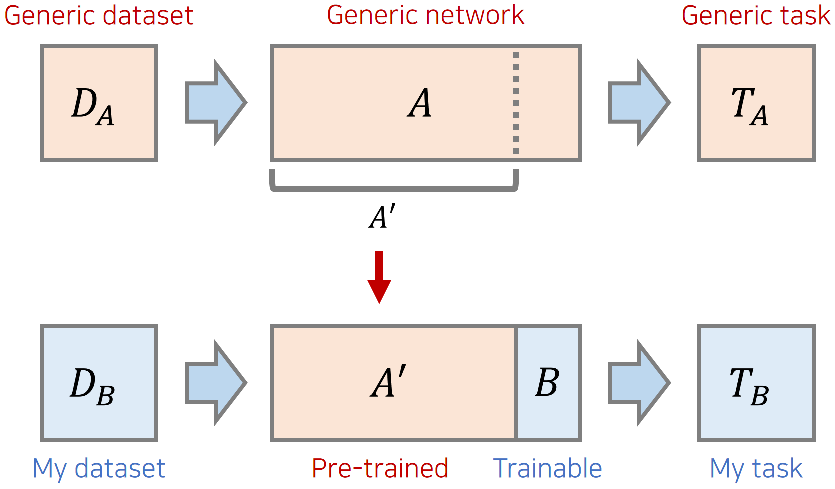

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [20]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 300
테스트 데이터셋 크기: 100
클래스: ['63빌딩', '가실성당', '가평역', '거가대교', '경주타워', '고란사', '돈의문', '숙정문', '숭례문', '흥인지문']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


* 간단히 이미지를 시각화해 봅시다.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


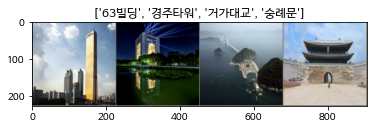

In [21]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [23]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

* 학습을 진행합니다.

In [24]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#0 Loss: 1.4860 Acc: 50.6667% Time: 6.3369s
#1 Loss: 0.5685 Acc: 84.6667% Time: 12.6875s
#2 Loss: 0.3653 Acc: 91.3333% Time: 18.9975s
#3 Loss: 0.2990 Acc: 92.6667% Time: 25.5309s
#4 Loss: 0.1730 Acc: 94.6667% Time: 32.2931s
#5 Loss: 0.2344 Acc: 95.0000% Time: 38.9946s
#6 Loss: 0.2016 Acc: 96.3333% Time: 45.7370s
#7 Loss: 0.1395 Acc: 96.3333% Time: 52.2213s
#8 Loss: 0.0513 Acc: 99.6667% Time: 58.5434s
#9 Loss: 0.1128 Acc: 96.6667% Time: 64.8756s
#10 Loss: 0.0909 Acc: 97.3333% Time: 71.1792s
#11 Loss: 0.0928 Acc: 97.3333% Time: 77.4966s
#12 Loss: 0.0754 Acc: 97.6667% Time: 83.8721s
#13 Loss: 0.0947 Acc: 97.3333% Time: 90.3376s
#14 Loss: 0.1101 Acc: 97.0000% Time: 97.0357s
#15 Loss: 0.0448 Acc: 99.6667% Time: 103.7124s
#16 Loss: 0.0184 Acc: 100.0000% Time: 110.5654s
#17 Loss: 0.0341 Acc: 99.0000% Time: 116.9488s
#18 Loss: 0.0471 Acc: 99.3333% Time: 123.3789s
#19 Loss: 0.0237 Acc: 100.0000% Time: 130.1159s
#20 Loss: 0.0299 Acc: 99.3333% Time: 136.7835s
#21 Loss: 0.0128 Acc: 100.0000% Time:

* 학습된 모델을 평가합니다.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[예측 결과: 돈의문] (실제 정답: 돈의문)


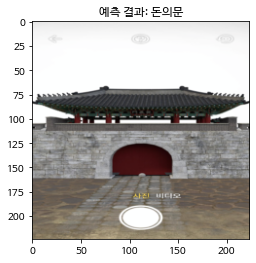

[예측 결과: 경주타워] (실제 정답: 경주타워)


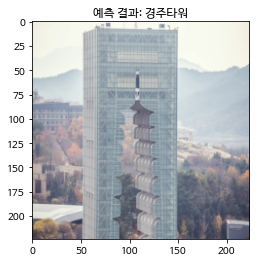

[예측 결과: 흥인지문] (실제 정답: 흥인지문)


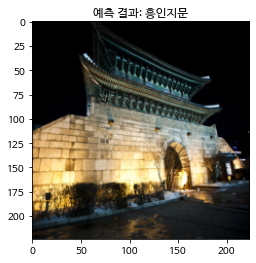

[예측 결과: 경주타워] (실제 정답: 경주타워)


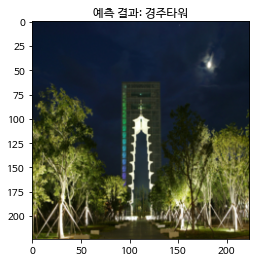

[예측 결과: 숭례문] (실제 정답: 숭례문)


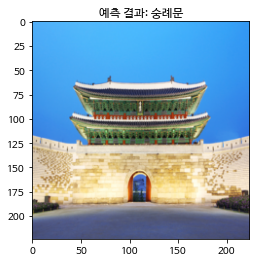

[예측 결과: 숙정문] (실제 정답: 숙정문)


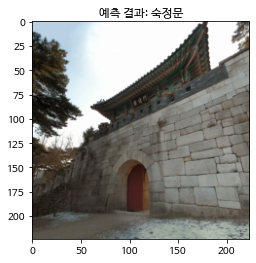

[예측 결과: 숭례문] (실제 정답: 숭례문)


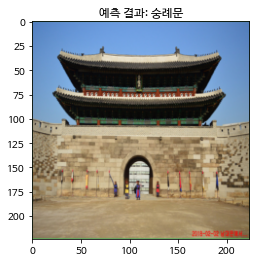

[예측 결과: 고란사] (실제 정답: 고란사)


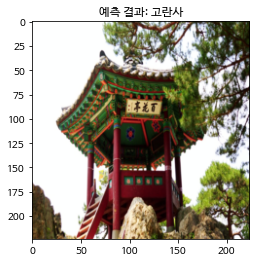

[예측 결과: 흥인지문] (실제 정답: 흥인지문)


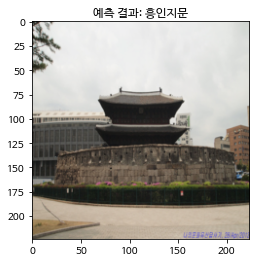

[예측 결과: 돈의문] (실제 정답: 돈의문)


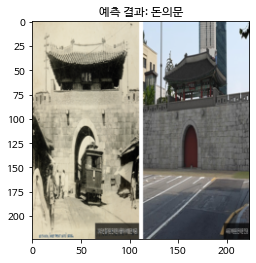

[예측 결과: 고란사] (실제 정답: 고란사)


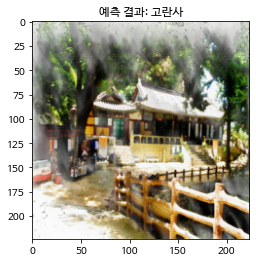

[예측 결과: 숭례문] (실제 정답: 숭례문)


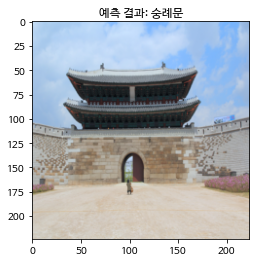

[예측 결과: 거가대교] (실제 정답: 거가대교)


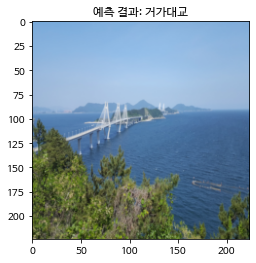

[예측 결과: 고란사] (실제 정답: 고란사)


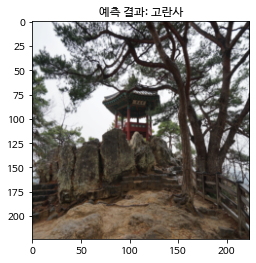

[예측 결과: 돈의문] (실제 정답: 돈의문)


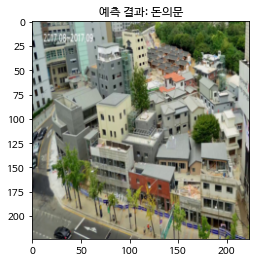

[예측 결과: 돈의문] (실제 정답: 돈의문)


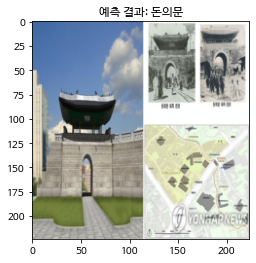

[예측 결과: 가평역] (실제 정답: 가평역)


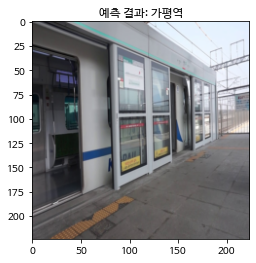

[예측 결과: 숙정문] (실제 정답: 숙정문)


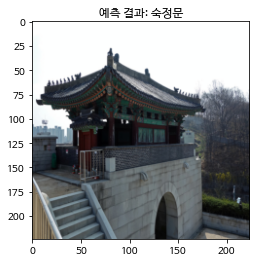

[예측 결과: 고란사] (실제 정답: 고란사)


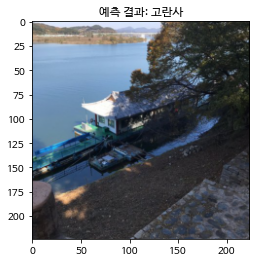

[예측 결과: 가실성당] (실제 정답: 가실성당)


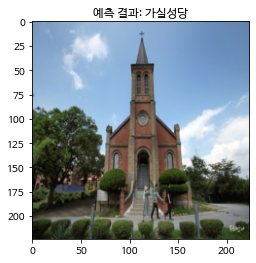

[예측 결과: 63빌딩] (실제 정답: 63빌딩)


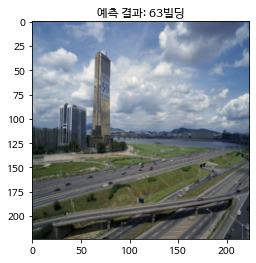

[예측 결과: 63빌딩] (실제 정답: 63빌딩)


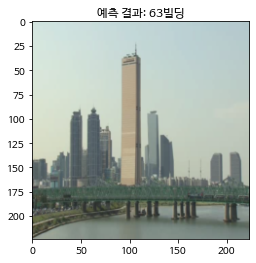

[예측 결과: 흥인지문] (실제 정답: 흥인지문)


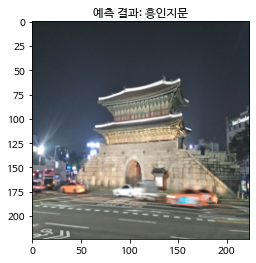

[예측 결과: 경주타워] (실제 정답: 경주타워)


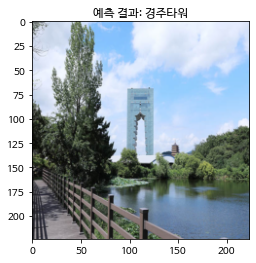

[예측 결과: 가실성당] (실제 정답: 가실성당)


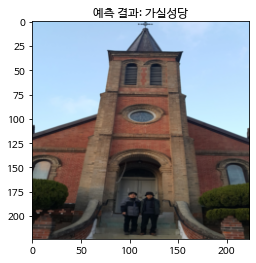

[Test Phase] Loss: 0.3954 Acc: 92.0000% Time: 6.7544s


In [25]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

--2021-02-23 07:53:41--  https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4070584 (3.9M) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]   3.88M  --.-KB/s    in 0.1s    

2021-02-23 07:53:41 (29.0 MB/s) - ‘test_image.jpg’ saved [4070584/4070584]



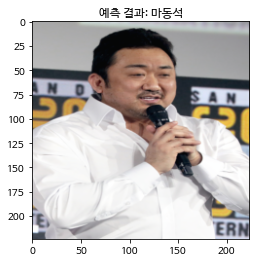

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c4cdb8de3a35.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


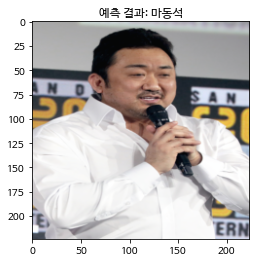

127.0.0.1 - - [23/Feb/2021 08:06:33] "POST / HTTP/1.1" 200 -


결과: {'class_name': '마동석'}


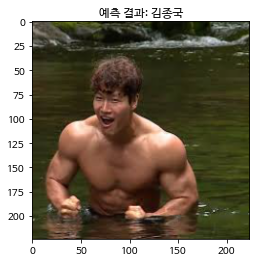

127.0.0.1 - - [23/Feb/2021 08:06:51] "POST / HTTP/1.1" 200 -


결과: {'class_name': '김종국'}


In [ ]:
run_with_ngrok(app)
app.run()

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.